# Best Practices For Applying Machine Learning 
## By Andrew Ng (https://www.coursera.com)
## Elaborated by Shivam Kumar (https://www.linkedin.com/in/entrepreneur-shivam)

# 1 - Packages
First, let's run the cell below to import all the packages that you will need during this assignment.

* numpy is the fundamental package for scientific computing Python.
* matplotlib is a popular library to plot graphs in Python.
* scikitlearn is a basic library for data mining
* tensorflow a popular platform for machine learning.

In [4]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

# 2 - Evaluating a Learning Algorithm (Polynomial Regression)
Let's say you have created a machine learning model and you find it fits your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for new examples.

How can you test your model's performance on new data before deploying it?
The answer has two parts:

* Split your original data set into "Training" and "Test" sets.
    1. Use the training data to fit the parameters of the model
    2. Use the test data to evaluate the model on new data
* Develop an error function to evaluate your model.

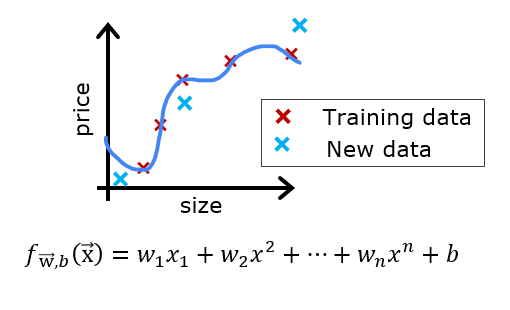

## 2.1 Splitting your data set
It is advised to reserve 20-40% of your data set for testing. Let's use an sklearn function train_test_split to perform the split. Double-check the shapes after running the following cell.

In [5]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

<h4>Shivam:</h4> The main idea here is to have a basic intution of the dataset and its distribution. 

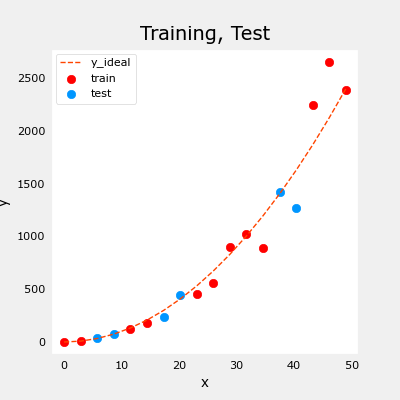

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

## 2.2 Error calculation for model evaluation, linear regression
When evaluating a linear regression model, you average the squared error difference of the predicted values and the target values.

### Exercise 1
Below, create a function to evaluate the error on a data set for a linear regression model.

<h4>Shivam</h4>
Squared error is the sqaure of difference between predicted value and labeled value of y.
Below the given function eval_mse(y, yhat): takes input y & yhat as array.

In [8]:
def eval_mse(y, yhat):
    m = len(y)
    err = 0.0
    for i in range(m):
        err+=(y[i]-yhat[i])**2
    err/= 2*m
    return(err)

In [9]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)

 All tests passed.


## 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from sklearn. The code is in the imported utility file if you would like to see the details. The steps below are:

* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

<h4>Shivam</h4>
When we have to fit data which is not linearly separable, we fit a high degree polynomial. What it does is it maximizes the weight of the degree which fits the data perfectly and minimizes the weight of degree that doesn't contribute significantly to the fitting process.

In [19]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

In [20]:
# The computed error on the training set is substantially less than that of the test set.
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

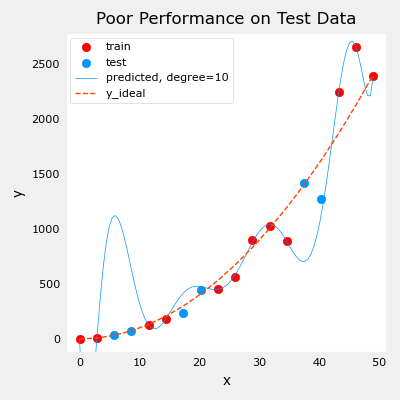

In [21]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent new data. You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

training data (Data used to tune model parameters w and b in training or fitting) - 60%,
cross-validation data (Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network) - 20%,
test data (Data used to test the model after tuning to gauge performance on new data) - 20%

<h4>Shivam</h4>
When you do not have sufficiently large amount of data, what would you like to do is to create a training set of 80% and 10% to cross-validation and test set each.

Let's generate three data sets below. We'll once again use train_test_split from sklearn but will call it twice to get three splits:

In [22]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


# 3 - Bias and Variance

Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

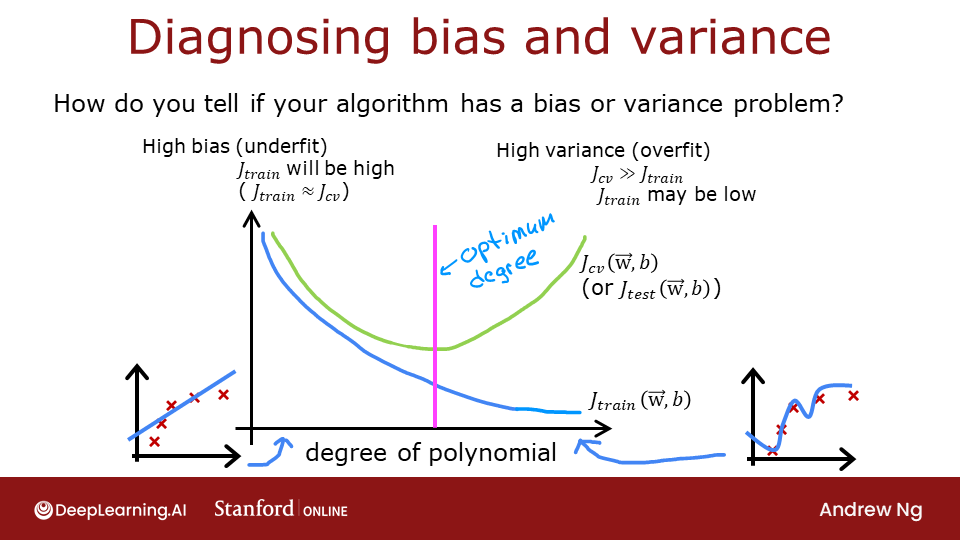

## 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

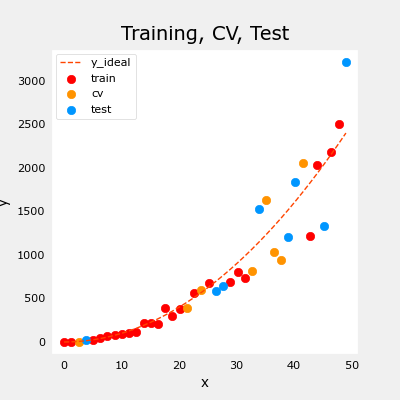

In [23]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

## 3.2 Finding the optimal degree
We could create a model capable of fitting complex curves by utilizing a polynomial. Previously we have seen that by increasing the degree of the polynomial, we could create overfitting. Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the scikit-learn linear regression model for speed and simplicity.

In [24]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

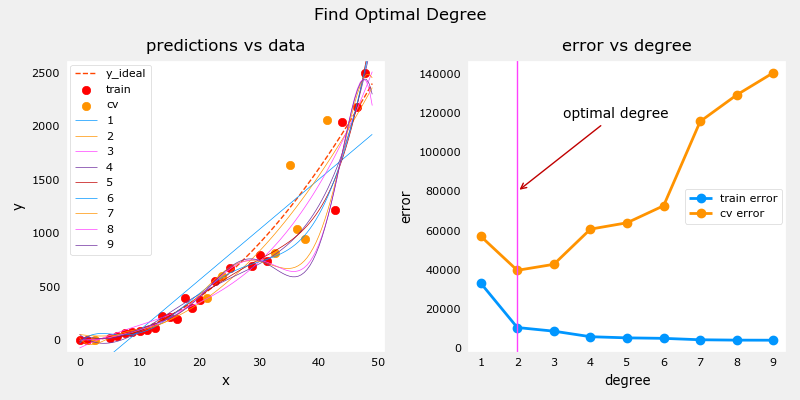

In [25]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used.

1. On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point.
2. On the right:
    * the error on the trained data (blue) decreases as the model complexity increases as expected
    * the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to generalize).

## 3.3 Tuning Regularization
Regularization is utlizied to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda.

<h4>Shivam</h4>
Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

In [28]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv)

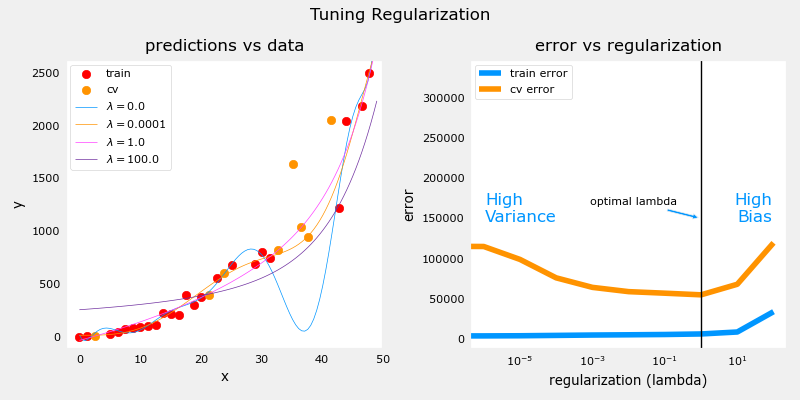

In [29]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10.

## 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance.

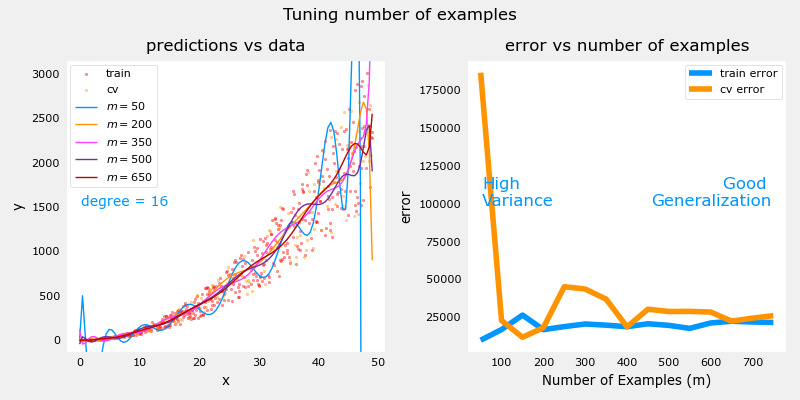

In [31]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of m is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization.

<h4>Shivam</h4>
In case you cannot get more data, then you can apply data augmentation techniques to produce more data for reducing overfitting.

<b>Note:</b> That adding more examples when the model has high bias (underfitting) does not improve performance.

# 4 - Evaluating a Learning Algorithm (Neural Network)

Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.

In [32]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs() 

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


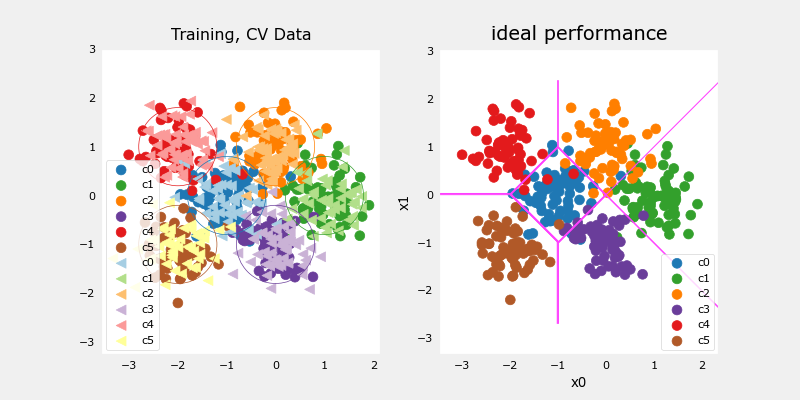

In [33]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

## 4.2 Evaluating categorical model by calculating classification error

In [34]:
def eval_cat_err(y, yhat):
    m = len(y)
    incorrect = 0
    for i in range(m):
        if(yhat[i]!=y[i]):
            incorrect+=1
    cerr=incorrect/m
    return(cerr)

In [35]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

test_eval_cat_err(eval_cat_err)

test_eval_cat_err(eval_cat_err)

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


# 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

## 5.1 Complex model

Below, compose a three-layer model:

* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)

Compile using
* loss with SparseCategoricalCrossentropy, remember to use from_logits=True
* Adam optimizer with learning rate of 0.01.

In [36]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Dense(120, activation="relu"),
        tf.keras.layers.Dense(40, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")
    ], name="Complex"
)

In [38]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
)

In [39]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.0910
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2951
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2637
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2794
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2462
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2249
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2084
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2297
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2122
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1686
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 103/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1790
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1585
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1477
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1524
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 108/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1538
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1424
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1402
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1510
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1520
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1026
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1007
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1008
Epoch 204/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1065
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1059
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1187
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1478
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1177
Epoch 209/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1670
Epoch 210/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1824
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0918
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0977
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0950
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0810
Epoch 305/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0835
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0929
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 397/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0614
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0728
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 404/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 405/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 495/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0456
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0410
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 499/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 500/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0405
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0367
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0388
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 596/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 692/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0340
Epoch 693/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0322
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 696/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 697/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0212
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 795/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 889/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 893/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 894/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 987/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 991/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 995/1000
13/1

In [40]:
model.summary()

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_test(model, classes, X_train.shape[1]) 

All tests passed!


1082/1082 [==============================] - 1s 1ms/step


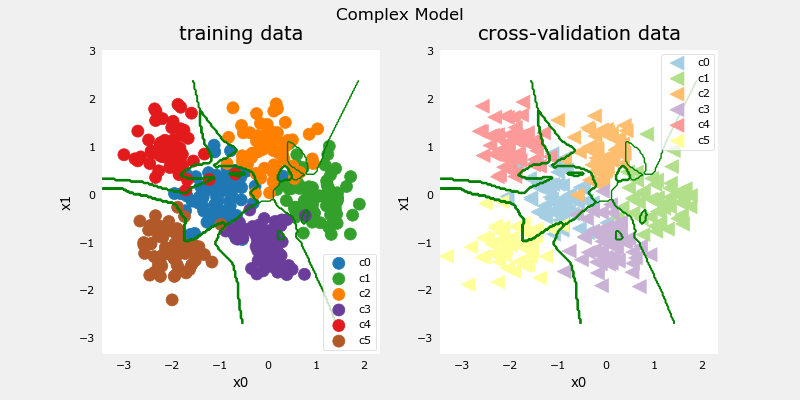

In [42]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [43]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 799us/step
categorization error, training, complex model: 0.015
categorization error, cv,       complex model: 0.113


# 5.1 Simple model
Now, let's try a simple model

Below, compose a two-layer model:

* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation.

Compile using

* loss with SparseCategoricalCrossentropy, remember to use from_logits=True
* Adam optimizer with learning rate of 0.01.

In [45]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")
    ], name = "Simple"
)
model_s.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

In [46]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

model_s.fit(
    X_train,y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.8563
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6012
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3960
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1946
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0127
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.8584
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7432
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6446
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5653
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5032
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4529
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4187
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 1ms/step - loss: 0.2020
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2036
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2045
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1999
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1978
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1986
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1976
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1976
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1993
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1988
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1971
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1993
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1951
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1915
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1904
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1889
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1895
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1908
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1886
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1921
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1888
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1932
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1877
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1912
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1894
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1858
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1885
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1871
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1851
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1920
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1896
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1885
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1884
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1859
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1842
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1863
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1848
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1840
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1842
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1819
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1836
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1869
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1826
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1879
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1831
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1861
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1835
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1856
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1815
Epoch 505/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1837
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1841
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1793
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1810
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1826
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1818
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1793
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1811
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1816
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1791
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1788
Epoch 697/1000
13/13 [==============================] - 0s 664us/step - loss: 0.1810
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1817
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1799
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1830
Epoch 701/1000
13

13/13 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1817
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1825
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1787
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1884
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1771
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1826
Epoch 799/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1788
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1806
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1816
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1803
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1777
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1782
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1813
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1806
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1774
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1801
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1808
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1780
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1777
Epoch 995/1000
13/1

In [47]:
model_s.summary()

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 18        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_s_test(model_s, classes, X_train.shape[1])

All tests passed!


1082/1082 [==============================] - 1s 951us/step


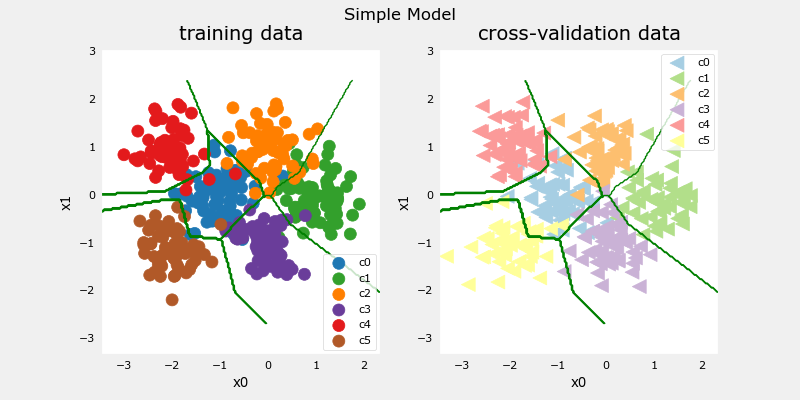

In [49]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [51]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 887us/step
categorization error, training, simple model, 0.060, complex model: 0.015
categorization error, cv,       simple model, 0.084, complex model: 0.113


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

# 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

Reconstruct your complex model, but this time include regularization. Below, compose a three-layer model:

* Dense layer with 120 units, relu activation, kernel_regularizer=tf.keras.regularizers.l2(0.1)
* Dense layer with 40 units, relu activation, kernel_regularizer=tf.keras.regularizers.l2(0.1)
* Dense layer with 6 units and a linear activation.

Compile using

* loss with SparseCategoricalCrossentropy, remember to use from_logits=True
* Adam optimizer with learning rate of 0.01.

In [54]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        tf.keras.layers.Dense(120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6, activation="linear")
    ], name= None
)

In [55]:
model_r.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

In [56]:
model_r.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 1s 4ms/step - loss: 4.3886
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.5825
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.2372
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.0284
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9609
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9374
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9033
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8693
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8033
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7563
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7500
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7461
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 3ms/step - loss: 0.4809
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4655
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4661
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4562
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5008
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4729
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4607
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4677
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4526
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4531
Epoch 111/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4534
Epoch 112/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4494
Epoch 113/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4038
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4041
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4255
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3948
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3941
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4074
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4536
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4303
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4074
Epoch 208/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4136
Epoch 209/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4343
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4120
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3834
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3905
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4249
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3922
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3911
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3864
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3774
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3776
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3855
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3907
Epoch 308/1000
13/13 [==============================] - 0s 840us/step - loss: 0.3869
Epoch 309/1000
13

13/13 [==============================] - 0s 1ms/step - loss: 0.3924
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3791
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3884
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3720
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3693
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3538
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3580
Epoch 403/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3577
Epoch 404/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3604
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3513
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3572
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3485
Epoch 494/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3494
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3475
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3721
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3979
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3456
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3395
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3578
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3835
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3627
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3396
Epoch 593/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3360
Epoch 594/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3347
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4133
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3489
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3388
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3324
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3486
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3299
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3406
Epoch 603/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4018
Epoch 690/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3739
Epoch 691/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3575
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3486
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3347
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3424
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3339
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3323
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3280
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3441
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 701/1000
13/1

13/13 [==============================] - 0s 950us/step - loss: 0.3319
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3244
Epoch 789/1000
13/13 [==============================] - 0s 837us/step - loss: 0.3317
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3314
Epoch 791/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3665
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3508
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3746
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3713
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3218
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 799/1000


13/13 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3393
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 888/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3360
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3289
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3665
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3204
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3234
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3315
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3354
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3483
Epoch 897/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3093
Epoch 984/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3264
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3443
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3484
Epoch 987/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3610
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3522
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3251
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3320
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3252
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3383
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3181
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3180
Epoch 995/1000
13/1

In [57]:
model_r.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 120)               360       
                                                                 
 dense_11 (Dense)            (None, 40)                4840      
                                                                 
 dense_12 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_r_test(model_r, classes, X_train.shape[1]) 

ddd
All tests passed!


1082/1082 [==============================] - 1s 1ms/step


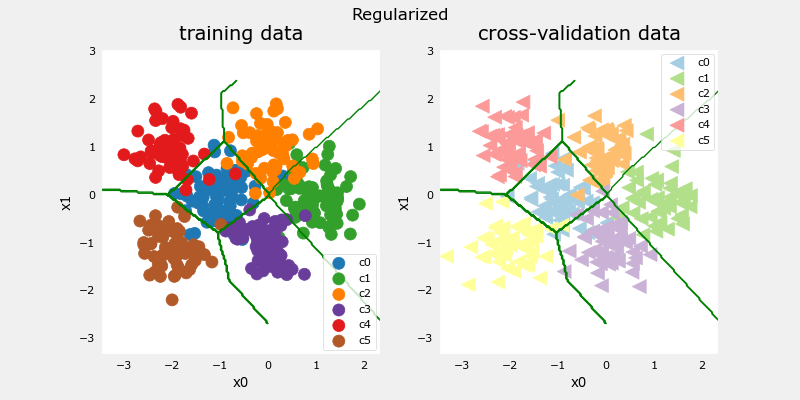

In [59]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [70]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 4ms/step
categorization error, training, regularized: 0.058, simple model, 0.060, complex model: 0.015
categorization error, cv,       regularized: 0.075, simple model, 0.084, complex model: 0.113


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

# 7 - Iterate to find optimal regularization value

In [72]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 1.0315
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3930
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3273
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2583
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2701
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2386
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2289
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2010
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2161
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1517
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1756
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1431
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1527
Epoch 108/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1426
Epoch 109/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1451
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1346
Epoch 111/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1390
Epoch 112/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1454
Epoch 113/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1068
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1127
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1104
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1152
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1774
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1329
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1129
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1272
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1085
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1165
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 298/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0599
Epoch 299/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 300/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0820
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1112
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0774
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0648
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0687
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0674
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0685
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0824
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0782
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0709
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 400/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0790
Epoch 401/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0591
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0449
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 497/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 600/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0618
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0494
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0449
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0585
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 697/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0670
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0577
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 701/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 789/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0290
Epoch 794/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0323
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1366
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1158
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0870
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0628
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 985/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0284
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 994/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 995/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2366
Epoch 83/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2312
Epoch 84/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2333
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2399
Epoch 86/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2244
Epoch 87/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2298
Epoch 88/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2408
Epoch 89/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2307
Epoch 90/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2280
Epoch 91/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2233
Epoch 92/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2182
Epoch 93/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2222
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 3ms/step - loss: 0.2233
Epoch 182/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2192
Epoch 183/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2204
Epoch 184/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2180
Epoch 185/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2145
Epoch 186/1000
13/13 [==============================] - 0s 957us/step - loss: 0.2016
Epoch 187/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2130
Epoch 188/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2073
Epoch 189/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2086
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2150
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 192/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2127
Epoch 193/1000
13

13/13 [==============================] - 0s 2ms/step - loss: 0.2054
Epoch 280/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1952
Epoch 281/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1967
Epoch 282/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1938
Epoch 283/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2026
Epoch 284/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1967
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1886
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1949
Epoch 287/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1942
Epoch 288/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2092
Epoch 289/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1998
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2042
Epoch 291/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1814
Epoch 378/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1891
Epoch 379/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1898
Epoch 380/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 381/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1890
Epoch 382/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 383/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2005
Epoch 384/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1888
Epoch 385/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1853
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1843
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1859
Epoch 388/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1853
Epoch 389/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1893
Epoch 476/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1829
Epoch 477/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 478/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1985
Epoch 479/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1834
Epoch 480/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1791
Epoch 481/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1762
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1741
Epoch 483/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1765
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1755
Epoch 487/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 574/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1666
Epoch 575/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649
Epoch 576/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663
Epoch 577/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1704
Epoch 578/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1715
Epoch 579/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1663
Epoch 580/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1771
Epoch 581/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1693
Epoch 582/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1684
Epoch 583/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1751
Epoch 584/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2098
Epoch 585/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1670
Epoch 672/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1728
Epoch 673/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1593
Epoch 674/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1733
Epoch 675/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1693
Epoch 676/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1605
Epoch 677/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1619
Epoch 678/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1661
Epoch 679/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1704
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1762
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1727
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1742
Epoch 683/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1574
Epoch 770/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1592
Epoch 771/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1655
Epoch 772/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1584
Epoch 773/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1696
Epoch 774/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 775/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1681
Epoch 776/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1584
Epoch 777/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1632
Epoch 778/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1625
Epoch 779/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1576
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576
Epoch 781/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1584
Epoch 868/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 869/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1545
Epoch 870/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1589
Epoch 871/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559
Epoch 872/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1521
Epoch 873/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1530
Epoch 874/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1522
Epoch 875/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1570
Epoch 876/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1500
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1514
Epoch 878/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1566
Epoch 879/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 966/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1521
Epoch 967/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1709
Epoch 968/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1787
Epoch 969/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1623
Epoch 970/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1640
Epoch 971/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 972/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1551
Epoch 973/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1532
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568
Epoch 976/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1537
Epoch 977/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3652
Epoch 65/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 66/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3490
Epoch 67/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3638
Epoch 68/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3541
Epoch 69/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3241
Epoch 70/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3117
Epoch 71/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3176
Epoch 72/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2990
Epoch 73/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3037
Epoch 74/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3087
Epoch 75/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3303
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.2810
Epoch 164/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2951
Epoch 165/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2883
Epoch 166/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2803
Epoch 167/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2825
Epoch 168/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2863
Epoch 169/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2841
Epoch 170/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2852
Epoch 171/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2675
Epoch 172/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2622
Epoch 173/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2893
Epoch 174/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2890
Epoch 175/1000
13/1

13/13 [==============================] - 0s 670us/step - loss: 0.2790
Epoch 262/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2622
Epoch 263/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2590
Epoch 264/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2504
Epoch 265/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2695
Epoch 266/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2668
Epoch 267/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 268/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2553
Epoch 269/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 270/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2681
Epoch 271/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2611
Epoch 272/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2609
Epoch 273/1000
13

13/13 [==============================] - 0s 2ms/step - loss: 0.2530
Epoch 360/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2672
Epoch 361/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2488
Epoch 362/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 363/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2792
Epoch 364/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2679
Epoch 365/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2565
Epoch 366/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2609
Epoch 367/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 368/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2641
Epoch 369/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2586
Epoch 370/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2549
Epoch 371/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2405
Epoch 458/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2592
Epoch 459/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2452
Epoch 460/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2430
Epoch 461/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2727
Epoch 462/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2385
Epoch 463/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2383
Epoch 464/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2439
Epoch 465/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2614
Epoch 466/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2589
Epoch 467/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2522
Epoch 468/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2491
Epoch 469/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2467
Epoch 556/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 557/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2388
Epoch 558/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 559/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2615
Epoch 560/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2539
Epoch 561/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2432
Epoch 562/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2619
Epoch 563/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2369
Epoch 564/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2436
Epoch 565/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2485
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 567/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2320
Epoch 654/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2439
Epoch 655/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 656/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2327
Epoch 657/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2303
Epoch 658/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 659/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 660/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2387
Epoch 661/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2283
Epoch 662/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2460
Epoch 663/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2364
Epoch 664/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2584
Epoch 665/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2402
Epoch 752/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2392
Epoch 753/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2260
Epoch 754/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2378
Epoch 755/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2337
Epoch 756/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2450
Epoch 757/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2455
Epoch 758/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2315
Epoch 759/1000
13/13 [==============================] - 0s 983us/step - loss: 0.2319
Epoch 760/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2423
Epoch 761/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 762/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2344
Epoch 763/1000
13

13/13 [==============================] - 0s 2ms/step - loss: 0.2256
Epoch 850/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2298
Epoch 851/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2374
Epoch 852/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2484
Epoch 853/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 854/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2357
Epoch 855/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2384
Epoch 856/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2204
Epoch 857/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2335
Epoch 858/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2308
Epoch 859/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2448
Epoch 860/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2333
Epoch 861/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2368
Epoch 948/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2354
Epoch 949/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2273
Epoch 950/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2205
Epoch 951/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2275
Epoch 952/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 953/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2357
Epoch 954/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2467
Epoch 955/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2325
Epoch 956/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2348
Epoch 957/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 958/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2392
Epoch 959/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4730
Epoch 47/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4357
Epoch 48/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4720
Epoch 49/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4684
Epoch 50/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4437
Epoch 51/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4558
Epoch 52/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4387
Epoch 53/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4541
Epoch 54/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 55/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4546
Epoch 56/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4227
Epoch 57/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4365
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3547
Epoch 147/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3815
Epoch 148/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3641
Epoch 149/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3573
Epoch 150/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3530
Epoch 151/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3533
Epoch 152/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 153/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3759
Epoch 154/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3537
Epoch 155/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3540
Epoch 156/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3582
Epoch 157/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3328
Epoch 244/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3460
Epoch 245/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3449
Epoch 246/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 247/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3277
Epoch 248/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3369
Epoch 249/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3479
Epoch 250/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3389
Epoch 251/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3667
Epoch 252/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3491
Epoch 253/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3407
Epoch 254/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3569
Epoch 255/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 342/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3312
Epoch 343/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 344/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 345/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3183
Epoch 346/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3220
Epoch 347/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3448
Epoch 348/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3627
Epoch 349/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3185
Epoch 350/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3403
Epoch 351/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3166
Epoch 352/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3448
Epoch 353/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3076
Epoch 440/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3057
Epoch 441/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3140
Epoch 442/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3272
Epoch 443/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 444/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3124
Epoch 445/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3233
Epoch 446/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3126
Epoch 447/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3370
Epoch 448/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3276
Epoch 449/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3082
Epoch 450/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3084
Epoch 451/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3596
Epoch 538/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3189
Epoch 539/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2968
Epoch 540/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3184
Epoch 541/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3238
Epoch 542/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3319
Epoch 543/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3227
Epoch 544/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3112
Epoch 545/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3049
Epoch 546/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3164
Epoch 547/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3300
Epoch 548/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3089
Epoch 549/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3339
Epoch 636/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3190
Epoch 637/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3088
Epoch 638/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3006
Epoch 639/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2982
Epoch 640/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2907
Epoch 641/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2908
Epoch 642/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3074
Epoch 643/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3207
Epoch 644/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2945
Epoch 645/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3113
Epoch 646/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3245
Epoch 647/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 734/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 735/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3153
Epoch 737/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3181
Epoch 738/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2987
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 740/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3054
Epoch 741/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3155
Epoch 742/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3547
Epoch 743/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2980
Epoch 744/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2904
Epoch 745/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3046
Epoch 832/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3162
Epoch 833/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3179
Epoch 834/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2916
Epoch 835/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2926
Epoch 836/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2841
Epoch 837/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2968
Epoch 838/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2994
Epoch 839/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2926
Epoch 840/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 841/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 842/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3043
Epoch 843/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2959
Epoch 930/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3071
Epoch 931/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3063
Epoch 932/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2974
Epoch 933/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2980
Epoch 934/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 935/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3034
Epoch 936/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 937/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 938/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 939/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2875
Epoch 940/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2861
Epoch 941/1000
13/1

Epoch 28/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6063
Epoch 29/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5938
Epoch 30/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6158
Epoch 31/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6072
Epoch 32/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6118
Epoch 33/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6100
Epoch 34/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6308
Epoch 35/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6281
Epoch 36/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6129
Epoch 37/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5835
Epoch 38/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5628
Epoch 39/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5640
Epoch 40/1000
13

13/13 [==============================] - 0s 3ms/step - loss: 0.4497
Epoch 128/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4355
Epoch 129/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4459
Epoch 130/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4405
Epoch 131/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4612
Epoch 132/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4369
Epoch 133/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4288
Epoch 134/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4536
Epoch 135/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4463
Epoch 136/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4508
Epoch 137/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4314
Epoch 138/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4500
Epoch 139/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4364
Epoch 226/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4291
Epoch 227/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4522
Epoch 228/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3986
Epoch 229/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4082
Epoch 230/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4192
Epoch 231/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4093
Epoch 232/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4186
Epoch 233/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3959
Epoch 234/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3959
Epoch 235/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3930
Epoch 236/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4012
Epoch 237/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4279
Epoch 324/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4281
Epoch 325/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4047
Epoch 326/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3933
Epoch 327/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3867
Epoch 328/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4012
Epoch 329/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3825
Epoch 330/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3730
Epoch 331/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3762
Epoch 332/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3786
Epoch 333/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4167
Epoch 334/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4000
Epoch 335/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3833
Epoch 422/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3936
Epoch 423/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3727
Epoch 424/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 425/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3637
Epoch 426/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3634
Epoch 427/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3648
Epoch 428/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3738
Epoch 429/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3714
Epoch 430/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3686
Epoch 431/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3554
Epoch 432/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3622
Epoch 433/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3650
Epoch 520/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 521/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 522/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3636
Epoch 523/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3791
Epoch 524/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3410
Epoch 525/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3484
Epoch 526/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3565
Epoch 527/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3398
Epoch 528/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3453
Epoch 529/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3785
Epoch 530/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3669
Epoch 531/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3278
Epoch 618/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3711
Epoch 619/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4143
Epoch 620/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3990
Epoch 621/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3465
Epoch 622/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3453
Epoch 623/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3480
Epoch 624/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3396
Epoch 625/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 626/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3412
Epoch 627/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3573
Epoch 628/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 629/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 716/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3379
Epoch 717/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3570
Epoch 718/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3719
Epoch 719/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 720/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4138
Epoch 721/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3897
Epoch 722/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3450
Epoch 723/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3546
Epoch 724/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3375
Epoch 725/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 726/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 727/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3322
Epoch 814/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3353
Epoch 815/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 816/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3465
Epoch 817/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3541
Epoch 818/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 819/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 820/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3699
Epoch 821/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3975
Epoch 822/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3450
Epoch 823/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3535
Epoch 824/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3544
Epoch 825/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3283
Epoch 912/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3258
Epoch 913/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3255
Epoch 914/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3565
Epoch 915/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 916/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3519
Epoch 917/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 918/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 919/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 920/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 921/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3365
Epoch 922/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3412
Epoch 923/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 1.0372
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.0133
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9760
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9522
Epoch 13/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9479
Epoch 14/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9489
Epoch 15/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9129
Epoch 16/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.8943
Epoch 17/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9114
Epoch 18/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9165
Epoch 19/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.8801
Epoch 20/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.8592
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5752
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5645
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5629
Epoch 112/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5561
Epoch 113/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5499
Epoch 114/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5498
Epoch 115/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5537
Epoch 116/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5535
Epoch 117/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5851
Epoch 118/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5894
Epoch 119/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5902
Epoch 120/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5776
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.5118
Epoch 208/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5263
Epoch 209/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5431
Epoch 210/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5080
Epoch 211/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4969
Epoch 212/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4914
Epoch 213/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4927
Epoch 214/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4872
Epoch 215/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4917
Epoch 216/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4996
Epoch 217/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4935
Epoch 218/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4932
Epoch 219/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4607
Epoch 306/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4824
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4638
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4532
Epoch 309/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4604
Epoch 310/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4535
Epoch 311/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4450
Epoch 312/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4527
Epoch 313/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4579
Epoch 314/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4594
Epoch 315/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4519
Epoch 316/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4442
Epoch 317/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4367
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4438
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4301
Epoch 406/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4307
Epoch 407/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4425
Epoch 408/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4630
Epoch 409/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4241
Epoch 410/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4355
Epoch 411/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4669
Epoch 412/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4261
Epoch 413/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4371
Epoch 414/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 415/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4090
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4180
Epoch 503/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4456
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4623
Epoch 505/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4530
Epoch 506/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 507/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4504
Epoch 508/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4075
Epoch 509/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4174
Epoch 510/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4126
Epoch 511/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4236
Epoch 512/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4223
Epoch 513/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3969
Epoch 600/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4076
Epoch 601/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3925
Epoch 602/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4012
Epoch 603/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3936
Epoch 604/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3965
Epoch 605/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4034
Epoch 606/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4269
Epoch 607/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4201
Epoch 608/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4224
Epoch 609/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4073
Epoch 610/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4349
Epoch 611/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3957
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4113
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3922
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3834
Epoch 701/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3980
Epoch 702/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3944
Epoch 703/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3764
Epoch 704/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4026
Epoch 705/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4033
Epoch 706/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4091
Epoch 707/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4193
Epoch 708/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4107
Epoch 709/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4225
Epoch 796/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4247
Epoch 797/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3851
Epoch 798/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3936
Epoch 799/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3866
Epoch 800/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3896
Epoch 801/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3834
Epoch 802/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3758
Epoch 803/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3740
Epoch 804/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3667
Epoch 805/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3842
Epoch 806/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3874
Epoch 807/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4004
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3887
Epoch 895/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4265
Epoch 896/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3961
Epoch 897/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3937
Epoch 898/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3921
Epoch 899/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4209
Epoch 900/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4054
Epoch 901/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4316
Epoch 902/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4243
Epoch 903/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4186
Epoch 904/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3754
Epoch 905/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3809
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3659
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3755
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 995/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3835
Epoch 996/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 997/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4069
Epoch 998/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3749
Epoch 999/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 1000/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4014
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 10.0625
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3017

13/13 [==============================] - 0s 3ms/step - loss: 0.6855
Epoch 91/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7054
Epoch 92/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6838
Epoch 93/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6802
Epoch 94/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6674
Epoch 95/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6753
Epoch 96/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6627
Epoch 97/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6602
Epoch 98/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6727
Epoch 99/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6934
Epoch 100/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7030
Epoch 101/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7008
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5823
Epoch 190/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5671
Epoch 191/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5816
Epoch 192/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5807
Epoch 193/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5788
Epoch 194/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5630
Epoch 195/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5612
Epoch 196/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5551
Epoch 197/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5653
Epoch 198/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5579
Epoch 199/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5619
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5705
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.5786
Epoch 288/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5837
Epoch 289/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5282
Epoch 290/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5242
Epoch 291/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5310
Epoch 292/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5122
Epoch 293/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5204
Epoch 294/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5231
Epoch 295/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5538
Epoch 296/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5236
Epoch 297/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5132
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5181
Epoch 299/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4939
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4805
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5013
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5007
Epoch 389/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4869
Epoch 390/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4773
Epoch 391/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4810
Epoch 392/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4891
Epoch 393/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4856
Epoch 394/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4871
Epoch 395/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5034
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5341
Epoch 397/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5177
Epoch 484/1000
13/13 [==============================] - 0s 791us/step - loss: 0.4833
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5244
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4802
Epoch 487/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4662
Epoch 488/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4581
Epoch 489/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4521
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4637
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4699
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4911
Epoch 493/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4695
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4548
Epoch 495/1000
13

13/13 [==============================] - 0s 3ms/step - loss: 0.4937
Epoch 582/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4821
Epoch 583/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4628
Epoch 584/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4448
Epoch 585/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4639
Epoch 586/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4964
Epoch 587/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4623
Epoch 588/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4502
Epoch 589/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4299
Epoch 590/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4328
Epoch 591/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4429
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4400
Epoch 593/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4440
Epoch 680/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4324
Epoch 681/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4754
Epoch 682/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4543
Epoch 683/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4408
Epoch 684/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4356
Epoch 685/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4333
Epoch 686/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4369
Epoch 687/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4338
Epoch 688/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4201
Epoch 689/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4628
Epoch 690/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4537
Epoch 691/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4563
Epoch 778/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4528
Epoch 779/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4374
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4249
Epoch 781/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4575
Epoch 782/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4156
Epoch 783/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4269
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4275
Epoch 785/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4145
Epoch 786/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4184
Epoch 787/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4284
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4192
Epoch 789/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4154
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4213
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4067
Epoch 878/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4207
Epoch 879/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4176
Epoch 880/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4272
Epoch 881/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4428
Epoch 882/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4602
Epoch 883/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4651
Epoch 884/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4530
Epoch 885/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4384
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4064
Epoch 887/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4037
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4054
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3979
Epoch 976/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4180
Epoch 977/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4190
Epoch 978/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4004
Epoch 979/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4204
Epoch 980/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4491
Epoch 981/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4353
Epoch 982/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4392
Epoch 983/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4069
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4158
Epoch 985/1000
13/1

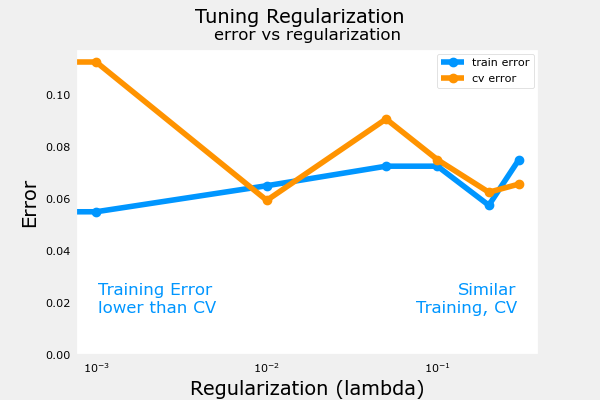

In [75]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

## 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance.

3/3 [==============================] - 0s 4ms/step


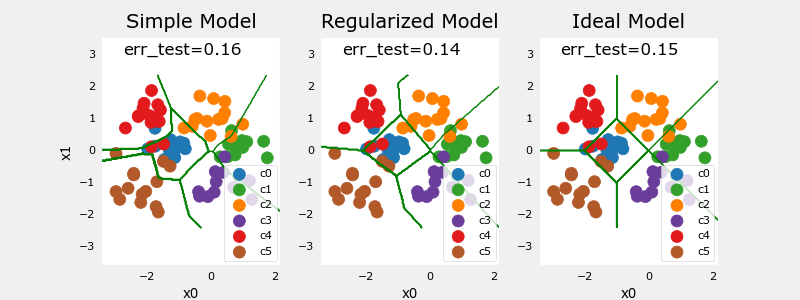

In [76]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)